<a href="https://colab.research.google.com/github/eduardadelavle/Machine-Learning/blob/main/AG_Mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação de bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt
import random
 

**Criando a mochila e os itens**

In [ ]:
itens = np.arange(1,21)

#randint nesse caso abaixo gera um vetor aleatório de 10 posições com valores de 1 até 15
peso = np.random.randint(1, 15, size = 20) 
valor = np.random.randint(10, 750, size = 20)
peso_total_maximo_mochila = 50    
print('Item No.   Peso   Valor')
#shape pega o tamanho do vetor 
for i in range(itens.shape[0]):
    print('{0}          {1}         {2}\n'.format(itens[i], peso[i], valor[i]))

Item No.   Peso   Valor
1          11         122

2          11         171

3          5         59

4          10         161

5          5         146

6          1         739

7          2         600

8          14         513

9          13         124

10          10         435

11          14         312

12          8         92

13          2         148

14          3         659

15          13         424

16          1         144

17          2         72

18          12         41

19          14         650

20          11         42



**Cria população inicial aleatóriamente e define o número de gerações (iterações) que o processo de busca irá ocorrer**

In [ ]:
solucoes_por_populacao = 50

#Esse comando abaixo serve para estabelecer um array onde temos 12 linhas com 10 colunas
pop_size = (solucoes_por_populacao, itens.shape[0])

print('Tamanho da População = {}'.format(pop_size))

populacao_inicial = np.random.randint(2, size = pop_size)
populacao_inicial = populacao_inicial.astype(int)
num_geracoes = 5
print('Populacao Inicial: \n{}'.format(populacao_inicial))

Tamanho da População = (50, 20)
Populacao Inicial: 
[[1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0]
 [1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1]
 [0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1]
 [1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1]
 [1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1]
 [1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1]
 [1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1]
 [0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0]
 [0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1]
 [1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0]
 [1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0]
 [0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1]
 [0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0]
 [0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1]
 [1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0]
 [1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1]
 [

**Calcula o fitness da população existente**

In [ ]:
#Calcula Fitness
def cal_fitness(peso, valor, populacao, peso_total_maximo_mochila):
    fitness = np.empty(populacao.shape[0])
    for i in range(populacao.shape[0]):
        S1 = np.sum(populacao[i] * valor)
        S2 = np.sum(populacao[i] * peso)
        if S2 <= peso_total_maximo_mochila:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)   

**Executa o processo**

In [ ]:
def optimize(pesos, valor, population, pop_size, num_geracoes, peso_total_maximo_mochila):
    parameters, fitness_history = [], []
    
    #proporção da quantidade dos pais que participarão da operação de cruzamento
    num_pais_selecao = int(pop_size[0]* 3/4)
    #faz a evolução do processo durante o número de gerações
    for i in range(num_geracoes):
        #calcula o fitness da população atual
        fitness = cal_fitness(pesos, valor, population, peso_total_maximo_mochila)
        
        #elitismo (novo) - mantém os melhor individuos
        population=population[fitness.argsort()[-pop_size[0]:][::-1]]
        fitness=fitness[fitness.argsort()[-pop_size[0]:][::-1]]
        
        
        fitness_history.append(fitness)

        #seleciona os pais
        pais = selection(fitness, num_pais_selecao, population)

        #realiza o cruzamento
        filhos = crossover(pais)

        #realiza a mutação
        mutants = mutation(filhos)

        #insere novos filhos na populacao
        if(mutants.size != 0.):
          population=np.append(population, mutants, axis = 0)
        
        #Mantém apenas vetores únicos, ignorando repetições
        population, index = np.unique(population, axis=0, return_index=True)

        
    print('Última Geração: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(pesos, valor, population, peso_total_maximo_mochila)  

    print('Fitness da última geração: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

**Operação de seleção (usando torneio)**

In [ ]:
def selection(fitness2, num_pais, population):
    fitness = list(fitness2)
    parents = np.empty((num_pais, population.shape[1]))
    
    #taxa de comparação
    k=0.75
    for i in range(num_pais):

        #seleciona aleatoriamente dois individuos da população
        x1=random.randint(0, population.shape[0]-1)
        x2=random.randint(0, population.shape[0]-1)

        #Verifico se já não foram utilizados, se foram utilizados tenho que selecionar outro
        while(fitness[x1]==-999999):
          x1=random.randint(0, population.shape[0]-1)
        while(fitness[x2]==-999999):
          x2=random.randint(0, population.shape[0]-1)

        #Ajusto para o individuo de maior fitness sempre ser o x1
        if (fitness[x1]<fitness[x2]):
          aux=x1
          x1=x2
          x2=aux
        
        # Gero um número aleatóriamente e na sequencia comparo com k. 
        # Observem aqui que para um k grande, como 75%, o número aleatório tem maior chance de estar entre 0 e 75 do que 75 até 100
        # esse comportamento permite que 0 a 75 tenha mais chances de ser sorteado, então uso ele para dar chance ao fitness de maior valor
        r=random.random()
        # seleciono fitness de maior valor no primeiro caso e pior valor no segundo
        if (r<k):
          parents[i,:] = population[x1, :]
          fitness[x1] = -999999
        else:
          parents[i,:] = population[x2, :]
          fitness[x2] = -999999
    # retorno todos pais selecionados
    return parents

**Cruzamento**

In [ ]:
def crossover(parents):
    #gerando um vetor para armazenar os filhos
    offsprings = []
    #determinando que no cruzamento vou pegar o meio de cada individuo
    crossover_point = int(parents.shape[1]/2)

    #estabelecendo uma taxa do cruzamento ocorrer
    crossover_rate = 0.8
    i=0
    while (i < parents.shape[0]):
        x = rd.random()
        if x < crossover_rate:
          parent1_index = i%parents.shape[0]
          parent2_index = (i+1)%parents.shape[0]
          
          filho1 = np.empty(parents.shape[1])
          filho2 = np.empty(parents.shape[1])

          filho1[0:crossover_point] = parents[parent1_index,0:crossover_point]
          filho1[crossover_point:]  = parents[parent2_index,crossover_point:]
          
          filho2[0:crossover_point] = parents[parent2_index,0:crossover_point]
          filho2[crossover_point:]  = parents[parent1_index,crossover_point:]
          
          
          offsprings.append(filho1)
          offsprings.append(filho2)
        i=i+2
    return np.asarray(offsprings, dtype=np.int32)

In [ ]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants

**Main do código: Executo o código do GA**

In [ ]:
parameters, fitness_history = optimize(peso, valor, populacao_inicial, pop_size, num_geracoes, peso_total_maximo_mochila)
print('A solução que de saída é: \n{}'.format(parameters))
itens_selecionados = itens * parameters
print('\nOs item que irão maximizar a mochila são:')
total_peso=0
total_valor=0
for i in range(itens_selecionados.shape[1]):
  if itens_selecionados[0][i] != 0:
     print('{0}          {1}         {2}\n'.format(itens[i], peso[i], valor[i]))
     total_peso=total_peso+peso[i]
     total_valor=total_valor+valor[i]
print('      Peso: {0}        Valor {1}\n'.format(total_peso,total_valor))



Última Geração: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 0. 0. 0.]]

Fitness da última geração: 
[2123    0 1171  953    0    0  770  694 1145 1077    0    0    0    0
 1170    0 1740    0    0 2142 2189    0 2723 2420 2655    0 2160    0
    0    0    0    0    0    0    0    0 1924    0    0    0    0 1244
    0    0 2227    0 2627 1304 1452 3034 1042 1425  752  900    0    0
 2621 2553    0 1229    0    0    0    0 2447 2830 2301 1235 1618    0
    0    0    0    0    0    0    0    0 1631    0    0 1475    0    0]

A solução que de saída é: 
[array([0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0.])]

Os item que irão maximizar a mochila são:
4          10         161

5          5         146

6          1         739

7          2         600

8          14         513

14          3         659

16          1         144

17          2    

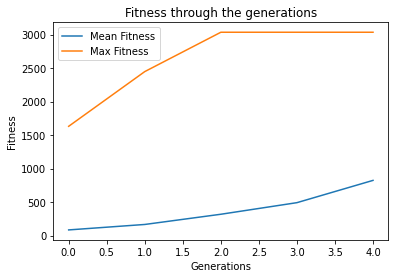

(5, 50)


In [ ]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_geracoes)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_geracoes)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)